In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib as tpl

In [2]:
from scipy.stats import norm
from scipy.special import gamma as gamma_func
from scipy.integrate import quad
np.random.seed(42)

In [3]:
# Make inline plots vector graphics
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("pdf", "svg")

#matplotlib.rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsfonts} \usepackage{amsmath}"

# Inverse Gamma Distribution

In [4]:
#change the basis, i.e. x -> t(x)

def inv_gamma_pdf(x, a, l):
    r = l**a/gamma_func(a) * (x ** (-a-1)) * (np.exp(-l/x))
    return(r)

def inv_gamma_t_log_pdf(x, a, l):
    c = l**a/gamma_func(a) 
    r = c * (np.exp(x) ** -a) * (np.exp(-l/np.exp(x)))
    return(r)

def inv_gamma_t_sqrt_pdf(x, a, l):
    c = 2*l**a/gamma_func(a)
    r = c * (x ** (-2*a-1)) * (np.exp(-l/x**2))
    return(r)

def inv_gamma_mu(a, l):
    return(l/(a+1))

def inv_gamma_var(a,l):
    return(l**2/(a+1)**3)
    
"""Transforms: log"""

def inv_gamma_t_log_mu(a, l):
    return(np.log(l/a))

def inv_gamma_t_log_var(a):
    return(1/a)

def log_normal_back(x, mu, sigma):
    x_ = np.log(x)
    return(norm.pdf(x_, mu, sigma) * 1/x)

"""Transforms: sqrt"""

def inv_gamma_t_sqrt_mu(a, l):
    return(np.sqrt(l/(a+0.5)))

def inv_gamma_t_sqrt_var(a, l):
    return(l/(4 * (a+0.5)**2))

def sqrt_normal_back(x, mu, sigma):
    x_ = np.sqrt(x)
    return(norm.pdf(x_, mu, sigma) * 0.5 * 1/np.sqrt(x))

In [5]:
"""values"""

def plot_inverse_gamma_t_log(params, save=False, filename='gamma_log_bridge.pdf', show_back=True):
    
    a1, l1 = params[0] #5,1
    a2, l2 = params[1] #4,2
    a3, l3 = params[2] #8,3

    #standard base
    mode1 = inv_gamma_mu(a1, l1)
    mode2 = inv_gamma_mu(a2, l2)
    mode3 = inv_gamma_mu(a3, l3)

    sigma1 = np.sqrt(inv_gamma_var(a1, l1))
    sigma2 = np.sqrt(inv_gamma_var(a2, l2))
    sigma3 = np.sqrt(inv_gamma_var(a3, l3))

    x = np.linspace(0, 2, 2000 + 1)
    x_t = np.linspace(-3, 2, 5000 + 1)
    y1 = inv_gamma_pdf(x, a1, l1) 
    y2 = inv_gamma_pdf(x, a2, l2) 
    y3 = inv_gamma_pdf(x, a3, l3) 
    lp_approx1 = norm.pdf(x, loc=mode1, scale=sigma1)
    lp_approx2 = norm.pdf(x, loc=mode2, scale=sigma2)
    lp_approx3 = norm.pdf(x, loc=mode3, scale=sigma3)

    #log basis
    y1_t_log = inv_gamma_t_log_pdf(x_t, a1, l1) 
    y2_t_log = inv_gamma_t_log_pdf(x_t, a2, l2) 
    y3_t_log = inv_gamma_t_log_pdf(x_t, a3, l3) 
    mode1_t_log = inv_gamma_t_log_mu(a1, l1)
    mode2_t_log = inv_gamma_t_log_mu(a2, l2)
    mode3_t_log = inv_gamma_t_log_mu(a3, l3)

    sigma1_t_log = np.sqrt(inv_gamma_t_log_var(a1))
    sigma2_t_log = np.sqrt(inv_gamma_t_log_var(a2))
    sigma3_t_log = np.sqrt(inv_gamma_t_log_var(a3))
    lp_approx1_t_log = norm.pdf(x_t, loc=mode1_t_log, scale=sigma1_t_log)
    lp_approx2_t_log = norm.pdf(x_t, loc=mode2_t_log, scale=sigma2_t_log)
    lp_approx3_t_log = norm.pdf(x_t, loc=mode3_t_log, scale=sigma3_t_log)

    #back
    y1_back = log_normal_back(x, mode1_t_log, sigma1_t_log) 
    y2_back = log_normal_back(x, mode2_t_log, sigma2_t_log) 
    y3_back = log_normal_back(x, mode3_t_log, sigma3_t_log) 

    """Plots"""
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=15)
    plt.rc('axes', labelsize=15)
    
    legend_size=14
    xlabel_size=15
    ylabel_size=15
    title_size=15
    lw=2

    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(10, 3))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
        
    #first plot
    axs[0].plot(x, y1, 'r-', lw=lw)
    axs[0].plot(x, y2, 'b-', lw=lw)
    axs[0].plot(x, y3, 'k-', lw=lw, label='$\mathcal{IG}$')
    axs[0].plot(x, lp_approx1, 'r--', lw=lw)
    axs[0].plot(x, lp_approx2, 'b--', lw=lw)
    axs[0].plot(x, lp_approx3, 'k--', lw=lw, label='$\mathcal{N}$')
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$g(x)$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    #second plot
    axs[1].plot(x_t, y1_t_log, 'r-', lw=lw)
    axs[1].plot(x_t, y2_t_log, 'b-', lw=lw)
    axs[1].plot(x_t, y3_t_log, 'k-', lw=lw, label='$\mathcal{IG}$')
    axs[1].plot(x_t, lp_approx1_t_log, 'r--', lw=lw)
    axs[1].plot(x_t, lp_approx2_t_log, 'b--', lw=lw)
    axs[1].plot(x_t, lp_approx3_t_log, 'k--', lw=lw, label='$\mathcal{N}$')
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_xlabel('$x$', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_title('Laplace in log basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});

    if show_back:
        axs[2].plot(x, y1, 'r-', lw=lw)
        axs[2].plot(x, y2, 'b-', lw=lw)
        axs[2].plot(x, y3, 'k-', lw=lw, label="$\mathcal{IG}$");
        axs[2].plot(x, y1_back, 'r--', lw=lw)
        axs[2].plot(x, y2_back, 'b--', lw=lw)
        axs[2].plot(x, y3_back, 'k--', lw=lw, label="$\mathcal{N}$")
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$g(x)$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
        axs[2].set_title('Back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});

    plt.tight_layout()
    
    if save:
        plt.savefig(filename)
        
    plt.show()

<ipython-input-4-d01307954421>:4: RuntimeWarning: divide by zero encountered in power
  r = l**a/gamma_func(a) * (x ** (-a-1)) * (np.exp(-l/x))
<ipython-input-4-d01307954421>:4: RuntimeWarning: divide by zero encountered in true_divide
  r = l**a/gamma_func(a) * (x ** (-a-1)) * (np.exp(-l/x))
<ipython-input-4-d01307954421>:4: RuntimeWarning: invalid value encountered in multiply
  r = l**a/gamma_func(a) * (x ** (-a-1)) * (np.exp(-l/x))
<ipython-input-4-d01307954421>:32: RuntimeWarning: divide by zero encountered in log
  x_ = np.log(x)
<ipython-input-4-d01307954421>:33: RuntimeWarning: invalid value encountered in true_divide
  return(norm.pdf(x_, mu, sigma) * 1/x)


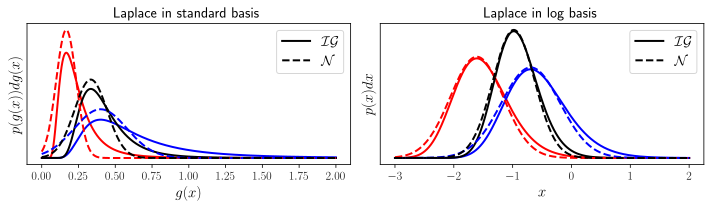

In [7]:
plot_inverse_gamma_t_log(params=[[5,1], [4,2], [8,3]], save=True, filename='Inverse_Gamma_log_bridge_wo_back.pdf', show_back=False)

In [8]:
############# sqrt bridge #################

def plot_inverse_gamma_t_sqrt(params, save=False, filename='gamma_sqrt_bridge.pdf', show_back=True):

    a1, l1 = params[0] #5,1
    a2, l2 = params[1] #4,2
    a3, l3 = params[2] #8,3

    mode1 = inv_gamma_mu(a1, l1)
    mode2 = inv_gamma_mu(a2, l2)
    mode3 = inv_gamma_mu(a3, l3)

    sigma1 = np.sqrt(inv_gamma_var(a1, l1))
    sigma2 = np.sqrt(inv_gamma_var(a2, l2))
    sigma3 = np.sqrt(inv_gamma_var(a3, l3))

    x = np.linspace(0, 2, 2000 + 1)
    x_t = np.linspace(0, 2, 2000 + 1)
    y1 = inv_gamma_pdf(x, a1, l1) 
    y2 = inv_gamma_pdf(x, a2, l2) 
    y3 = inv_gamma_pdf(x, a3, l3) 
    lp_approx1 = norm.pdf(x, loc=mode1, scale=sigma1)
    lp_approx2 = norm.pdf(x, loc=mode2, scale=sigma2)
    lp_approx3 = norm.pdf(x, loc=mode3, scale=sigma3)

    #sqrt basis
    y1_t_sqrt = inv_gamma_t_sqrt_pdf(x_t, a1, l1) 
    y2_t_sqrt = inv_gamma_t_sqrt_pdf(x_t, a2, l2) 
    y3_t_sqrt = inv_gamma_t_sqrt_pdf(x_t, a3, l3) 
    mode1_t_sqrt = inv_gamma_t_sqrt_mu(a1, l1)
    mode2_t_sqrt = inv_gamma_t_sqrt_mu(a2, l2)
    mode3_t_sqrt = inv_gamma_t_sqrt_mu(a3, l3)

    sigma1_t_sqrt = np.sqrt(inv_gamma_t_sqrt_var(a1, l1))
    sigma2_t_sqrt = np.sqrt(inv_gamma_t_sqrt_var(a2, l2))
    sigma3_t_sqrt = np.sqrt(inv_gamma_t_sqrt_var(a3, l3))
    lp_approx1_t_sqrt = norm.pdf(x_t, loc=mode1_t_sqrt, scale=sigma1_t_sqrt)
    lp_approx2_t_sqrt = norm.pdf(x_t, loc=mode2_t_sqrt, scale=sigma2_t_sqrt)
    lp_approx3_t_sqrt = norm.pdf(x_t, loc=mode3_t_sqrt, scale=sigma3_t_sqrt)

    #back
    y1_back = sqrt_normal_back(x, mode1_t_sqrt, sigma1_t_sqrt) 
    y2_back = sqrt_normal_back(x, mode2_t_sqrt, sigma2_t_sqrt) 
    y3_back = sqrt_normal_back(x, mode3_t_sqrt, sigma3_t_sqrt) 


    """Plots"""
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=15)
    plt.rc('axes', labelsize=15)
    
    legend_size=14
    xlabel_size=15
    ylabel_size=15
    title_size=16
    lw=2

    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(10, 3))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(10, 3))
        
    #first plot
    axs[0].plot(x, y1, 'r-', lw=lw)
    axs[0].plot(x, y2, 'b-', lw=lw)
    axs[0].plot(x, y3, 'k-', lw=lw, label='$\mathcal{IG}$')
    axs[0].plot(x, lp_approx1, 'r--', lw=lw)
    axs[0].plot(x, lp_approx2, 'b--', lw=lw)
    axs[0].plot(x, lp_approx3, 'k--', lw=lw, label='$\mathcal{N}$')
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$g(x)$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    #second plot
    axs[1].plot(x_t, y1_t_sqrt, 'r-', lw=lw)
    axs[1].plot(x_t, y2_t_sqrt, 'b-', lw=lw)
    axs[1].plot(x_t, y3_t_sqrt, 'k-', lw=lw, label='$\mathcal{IG}$')
    axs[1].plot(x_t, lp_approx1_t_sqrt, 'r--', lw=lw)
    axs[1].plot(x_t, lp_approx2_t_sqrt, 'b--', lw=lw)
    axs[1].plot(x_t, lp_approx3_t_sqrt, 'k--', lw=lw, label='$\mathcal{N}$')
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_xlabel('$x$', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_title('Laplace in sqrt basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});

    if show_back:
        axs[2].plot(x, y1, 'r-', lw=lw)
        axs[2].plot(x, y2, 'b-', lw=lw)
        axs[2].plot(x, y3, 'k-', lw=lw, label="$\mathcal{IG}$");
        axs[2].plot(x, y1_back, 'r--', lw=lw)
        axs[2].plot(x, y2_back, 'b--', lw=lw)
        axs[2].plot(x, y3_back, 'k--', lw=lw, label="$\mathcal{N}$")
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$g(x)$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
        axs[2].set_title('Back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});

    plt.tight_layout()
    
    if save:
        plt.savefig(filename)
        
    plt.show()

<ipython-input-4-d01307954421>:4: RuntimeWarning: divide by zero encountered in power
  r = l**a/gamma_func(a) * (x ** (-a-1)) * (np.exp(-l/x))
<ipython-input-4-d01307954421>:4: RuntimeWarning: divide by zero encountered in true_divide
  r = l**a/gamma_func(a) * (x ** (-a-1)) * (np.exp(-l/x))
<ipython-input-4-d01307954421>:4: RuntimeWarning: invalid value encountered in multiply
  r = l**a/gamma_func(a) * (x ** (-a-1)) * (np.exp(-l/x))
<ipython-input-4-d01307954421>:14: RuntimeWarning: divide by zero encountered in power
  r = c * (x ** (-2*a-1)) * (np.exp(-l/x**2))
<ipython-input-4-d01307954421>:14: RuntimeWarning: divide by zero encountered in true_divide
  r = c * (x ** (-2*a-1)) * (np.exp(-l/x**2))
<ipython-input-4-d01307954421>:14: RuntimeWarning: invalid value encountered in multiply
  r = c * (x ** (-2*a-1)) * (np.exp(-l/x**2))
<ipython-input-4-d01307954421>:45: RuntimeWarning: divide by zero encountered in true_divide
  return(norm.pdf(x_, mu, sigma) * 0.5 * 1/np.sqrt(x))


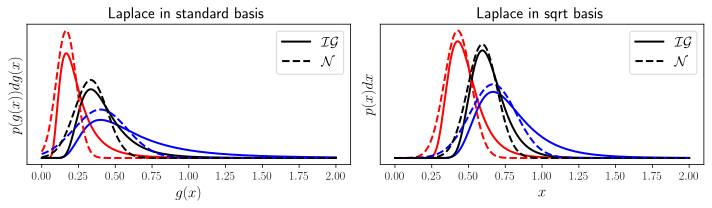

In [12]:
plot_inverse_gamma_t_sqrt(params=[[5,1], [4,2], [8,3]], save=True, filename='Inverse_Gamma_sqrt_bridge_wo_back.pdf', show_back=False)

# Verify the Bridges

In [8]:
#verify the log bridge

def inv_gamma_t_log_lambda(m,s): 
    return(np.exp(m)/s**2)

def inv_gamma_t_log_alpha(s):
    return(1/s**2)
    

test_a1, test_l1 = 3,4
test_m1, test_s1 = inv_gamma_t_log_mu(test_a1, test_l1), np.sqrt(inv_gamma_t_log_var(test_a1))
test_a2, test_l2 = inv_gamma_t_log_alpha(test_s1), inv_gamma_t_log_lambda(test_m1, test_s1)

print(test_a2, test_l2)

rand_a1, rand_l1 = np.random.random(), np.random.random()
rand_m1, rand_s1 = inv_gamma_t_log_mu(rand_a1, rand_l1), np.sqrt(inv_gamma_t_log_var(rand_a1))
rand_a2, rand_l2 = inv_gamma_t_log_alpha(rand_s1), inv_gamma_t_log_lambda(rand_m1, rand_s1)

assert(np.allclose(rand_a1, rand_a2))
assert(np.allclose(rand_l1, rand_l2))

3.0 4.0


In [9]:
#verify the sqrt bridge

def inv_gamma_t_sqrt_lambda(m, s): 
    return(m**4/(4*s**2))

def inv_gamma_t_sqrt_alpha(m, s):
    return(m**2/(4*s**2) - 0.5)
    
    

test_a3, test_l3 = 5,6
test_m3, test_s3 = inv_gamma_t_sqrt_mu(test_a3, test_l3), np.sqrt(inv_gamma_t_sqrt_var(test_a3, test_l3))
test_a4, test_l4 = inv_gamma_t_sqrt_alpha(test_m3, test_s3), inv_gamma_t_sqrt_lambda(test_m3, test_s3)

print(test_a4, test_l4)

rand_a3, rand_l3 = np.random.random()+1, np.random.random()+1
rand_m3, rand_s3 = inv_gamma_t_sqrt_mu(rand_a3, rand_l3), np.sqrt(inv_gamma_t_sqrt_var(rand_a3, rand_l3))
rand_a4, rand_l4 = inv_gamma_t_sqrt_alpha(rand_m3, rand_s3), inv_gamma_t_sqrt_lambda(rand_m3, rand_s3)

assert(np.allclose(rand_a3, rand_a4))
assert(np.allclose(rand_l3, rand_l4))

4.999999999999999 5.999999999999999


# Statistical distance measures

In [10]:
from torch_two_sample import MMDStatistic
from scipy.stats import norm, invgamma
import torch

## MMD from 100 combinations of parameters

In [11]:
def MMD_combinations(params, plot=False, n_samples=1000, verbose=True):
    
    As = params[0]
    Ls = params[1]
    
    MMD_sum = 0
    MMD_t_sqrt_sum = 0
    MMD_t_log_sum = 0 

    for a in As:
        for l in Ls:
            
            if verbose:
                print("a: ", a, "l: ", l)
                
            if a < 1:
                print("a < 1: not legitimate in standard base")
            
            #get samples from all dists
            #standard
            IG_samples = invgamma.rvs(a, scale=l, size=n_samples)
            if a >= 1:                
                mode1 = inv_gamma_mu(a, l)
                sigma1 = np.sqrt(inv_gamma_var(a, l))
                N_samples = norm.rvs(mode1, sigma1, size=n_samples)
            
            #log
            mode1_log = inv_gamma_t_log_mu(a, l)
            sigma1_log = np.sqrt(inv_gamma_t_log_var(a))
            IG_samples_log = np.log(IG_samples)
            N_samples_log = norm.rvs(mode1_log, sigma1_log, size=n_samples)
            
            #sqrt
            mode1_sqrt = inv_gamma_t_sqrt_mu(a, l)
            sigma1_sqrt = np.sqrt(inv_gamma_t_sqrt_var(a, l))
            IG_samples_sqrt = np.sqrt(IG_samples)
            N_samples_sqrt = norm.rvs(mode1_sqrt, sigma1_sqrt, size=n_samples)
            
            
            #calculate MMD for all bases
            MMD = MMDStatistic(n_samples, n_samples)
            
            #standard
            IG_samples_ = torch.Tensor(IG_samples.reshape((n_samples, -1)))
            if a >= 1:
                N_samples_ = torch.Tensor(N_samples.reshape((n_samples, -1)))
                MMD_ = MMD(IG_samples_, N_samples_,  alphas=[0.5], ret_matrix=False)
            else:
                MMD_ = torch.Tensor([np.nan])
                
            #log
            IG_samples_log_ = torch.Tensor(IG_samples_log.reshape((n_samples, -1)))
            N_samples_log_ = torch.Tensor(N_samples_log.reshape((n_samples, -1)))
            MMD_log_= MMD(IG_samples_log_, N_samples_log_,  alphas=[0.5], ret_matrix=False)
            
            #sqrt
            IG_samples_sqrt_ = torch.Tensor(IG_samples_sqrt.reshape((n_samples, -1)))
            N_samples_sqrt_ = torch.Tensor(N_samples_sqrt.reshape((n_samples, -1)))
            MMD_sqrt_ = MMD(IG_samples_sqrt_, N_samples_sqrt_,  alphas=[0.5], ret_matrix=False)

            if plot:
                n_bins = int(np.sqrt(n_samples))
                fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
                axs[0].hist(IG_samples, bins = n_bins, alpha=0.5, label='$\mathcal{IG}$')
                axs[0].hist(N_samples, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[0].set_title('standard basis')
                axs[0].legend()
                
                axs[1].hist(IG_samples_log, bins = n_bins, alpha=0.5, label='$\mathcal{IG}$')
                axs[1].hist(N_samples_log, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[1].set_title('log basis')
                axs[1].legend()
                
                axs[2].hist(IG_samples_sqrt, bins = n_bins, alpha=0.5, label='$\mathcal{IG}$')
                axs[2].hist(N_samples_sqrt, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[2].set_title('sqrt basis')
                axs[2].legend()
                
                plt.show()
                
            if verbose: 
                print("standard: ", MMD_.item(), "log: ", MMD_log_.item(), "sqrt: ", MMD_sqrt_.item())

            #add them to their respective sums
            MMD_sum += MMD_
            MMD_t_log_sum += MMD_log_
            MMD_t_sqrt_sum += MMD_sqrt_
            
    return(MMD_sum.item(), MMD_t_log_sum.item(), MMD_t_sqrt_sum.item())

In [12]:
MMD_combinations(params=[range(2, 12), range(1, 11)], plot=False, verbose=True, n_samples=2000)

a:  2 l:  1
standard:  0.09618979692459106 log:  0.01679772138595581 sqrt:  0.03740614652633667
a:  2 l:  2
standard:  0.17088353633880615 log:  0.014328420162200928 sqrt:  0.05178159475326538
a:  2 l:  3
standard:  0.168185293674469 log:  0.0169714093208313 sqrt:  0.06969660520553589
a:  2 l:  4
standard:  0.15860074758529663 log:  0.01227027177810669 sqrt:  0.07109588384628296
a:  2 l:  5
standard:  0.13537046313285828 log:  0.019725799560546875 sqrt:  0.07723325490951538
a:  2 l:  6
standard:  0.12036922574043274 log:  0.008124828338623047 sqrt:  0.0640404224395752
a:  2 l:  7
standard:  0.11503744125366211 log:  0.012950420379638672 sqrt:  0.07444101572036743
a:  2 l:  8
standard:  0.1086871325969696 log:  0.01554042100906372 sqrt:  0.07414329051971436
a:  2 l:  9
standard:  0.09489026665687561 log:  0.011864721775054932 sqrt:  0.08119899034500122
a:  2 l:  10
standard:  0.08884912729263306 log:  0.00983649492263794 sqrt:  0.07678395509719849
a:  3 l:  1
standard:  0.03712356090545

standard:  0.005048513412475586 log:  0.0010783672332763672 sqrt:  0.0013605356216430664
a:  10 l:  5
standard:  0.009017586708068848 log:  0.002128303050994873 sqrt:  0.002045750617980957
a:  10 l:  6
standard:  0.013408899307250977 log:  0.002160787582397461 sqrt:  0.002134382724761963
a:  10 l:  7
standard:  0.017008960247039795 log:  0.002032041549682617 sqrt:  0.0027595162391662598
a:  10 l:  8
standard:  0.019122660160064697 log:  0.0024085044860839844 sqrt:  0.003408491611480713
a:  10 l:  9
standard:  0.02408313751220703 log:  0.003857135772705078 sqrt:  0.0038691163063049316
a:  10 l:  10
standard:  0.022329092025756836 log:  0.001734614372253418 sqrt:  0.004176914691925049
a:  11 l:  1
standard:  0.00026935338973999023 log:  0.0023159384727478027 sqrt:  0.0003560781478881836
a:  11 l:  2
standard:  0.0008401274681091309 log:  0.0018922090530395508 sqrt:  0.0004431605339050293
a:  11 l:  3
standard:  0.0021047592163085938 log:  0.0011929869651794434 sqrt:  0.000828087329864502

(4.815736770629883, 0.4770660400390625, 1.6282156705856323)

In [13]:
results_MMD = np.array([4.747458457946777, 0.4852045178413391, 1.61481511592865])
results_MMD_normed = results_MMD/results_MMD[0]
print(results_MMD_normed)

[1.         0.102203   0.34014307]


## KL-divergence (mode seeking/backward, from PDF)

In [14]:
def normal_pdf(x, mu, sigma):
    return(1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)**2/sigma**2)))

In [15]:
# check out Samples vs Dir
# True distributions belong to samples_1
# Laplace approximations belong to samples_2

def KL_divergence_pdf(x_linspace, pdf_1, pdf_2, plot=False):
    
    pdf_1[pdf_1 < 1e-6] = 1e-6
    pdf_2[pdf_2 < 1e-6] = 1e-6
    
    #calculate KL_div
    KL_div = (pdf_1 * np.log(pdf_1 / pdf_2))
    
    #fill NaNs with 0
    KL_div = np.nan_to_num(KL_div)

    if plot:
        plt.plot(x_linspace, pdf_1, label='pdf_1')
        plt.plot(x_linspace, pdf_2, label='pdf_2')
        plt.plot(x_linspace, KL_div, lw=1, label='KL_div')
        plt.legend()
        plt.show()
            
    KL_div = np.sum(np.abs(KL_div))
    
    #normalize for comparison
    KL_div /= np.max(pdf_1)
        
    return(KL_div)

In [16]:
def adjust_dist(a, l, base='standard'):
    
    #base can be any of "standard", "sqrtm" or "log"
    
    if base == "log":
        x_large = np.linspace(-1000, 1000, 2000)
    else:
        x_large = np.linspace(0.0001, 1000, 1000)
        
    if base == "standard":
        
        mode = inv_gamma_mu(a, l)
        sigma = np.sqrt(inv_gamma_var(a, l))
        
        #get the range of x
        IG_pdf_large = inv_gamma_pdf(x_large, a, l)
        N_pdf_large = normal_pdf(x_large, mode, sigma)
        upper = np.max([np.sum(IG_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        x_plus = np.linspace(0.0001, upper, 1000)
        
        #now do the actual pdfs
        IG_pdf = inv_gamma_pdf(x_plus, a, l)
        N_pdf = normal_pdf(x_plus, mode, sigma)
        
        return(x_plus, IG_pdf, N_pdf)
    
    if base == "sqrt":
        
        mode_sqrt = inv_gamma_t_sqrt_mu(a, l)
        sigma_sqrt = np.sqrt(inv_gamma_t_sqrt_var(a, l))
        
        #get the range of x
        IG_pdf_large = inv_gamma_t_sqrt_pdf(x_large, a, l)
        N_pdf_large = normal_pdf(x_large, mode_sqrt, sigma_sqrt)
        upper = np.max([np.sum(IG_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        x_plus = np.linspace(0.0001, upper, 1000)
        
        #now do the actual pdfs
        IG_pdf = inv_gamma_t_sqrt_pdf(x_plus, a, l)
        N_pdf = normal_pdf(x_plus, mode_sqrt, sigma_sqrt)
        
        return(x_plus, IG_pdf, N_pdf)
    
    if base == "log":
        
        mode_log = inv_gamma_t_log_mu(a, l)
        sigma_log = np.sqrt(inv_gamma_t_log_var(a))
        
        #get the range of x
        IG_pdf_large = inv_gamma_t_log_pdf(x_large, a, l)
        N_pdf_large = normal_pdf(x_large, mode_log, sigma_log)
        range_ = np.max([np.sum(IG_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        lower = mode_log - range_/2
        upper = mode_log + range_/2
        x = np.linspace(lower, upper, 1000)
        
        #now do the actual pdfs
        IG_pdf = inv_gamma_t_log_pdf(x, a, l)
        N_pdf = normal_pdf(x, mode_log, sigma_log)
        
        return(x, IG_pdf, N_pdf)
        
        
        

In [17]:
def KL_div_pdf_combinations(params, plot=False, verbose=True):
    
    As = params[0]
    Ls = params[1]
    
    KL_div_sum = 0
    KL_div_t_sqrt_sum = 0
    KL_div_t_log_sum = 0 

    for a in As:
        for l in Ls:
            
            if verbose:
                print("a: ", a, "l: ", l)
                
            if a < 1:
                print("a < 1: not legitimate in standard base")
            
            #get the ranges and pdfs
            if a >= 1:
                x, IG_pdf, N_pdf = adjust_dist(a,l, 'standard')
            x_sqrt, IG_pdf_sqrt, N_pdf_sqrt = adjust_dist(a,l, 'sqrt')
            x_log, IG_pdf_log, N_pdf_log = adjust_dist(a,l, 'log')
            
            #calculate the KL divergences for all bases
            if a >= 1:
                KL_div_ = KL_divergence_pdf(x,IG_pdf, N_pdf, plot=plot)
            else:
                KL_div_ = np.nan
            KL_div_log_ = KL_divergence_pdf(x_log, IG_pdf_log, N_pdf_log, plot=plot)
            KL_div_sqrt_ = KL_divergence_pdf(x_sqrt, IG_pdf_sqrt, N_pdf_sqrt, plot=plot) 
            
            #add them to their respective sums
            if a >= 1:
                KL_div_sum += KL_div_
            else:
                KL_div_sum += np.nan
                
            KL_div_t_log_sum += KL_div_log_
            if not np.isnan(KL_div_sqrt_):
                KL_div_t_sqrt_sum += KL_div_sqrt_
            else:
                print("Value was NaN, added constant 100")
                KL_div_t_sqrt_sum += 100
            
            if verbose:
                print("standard: ", KL_div_, "log: ", KL_div_log_, "sqrt: ", KL_div_sqrt_)
            
            
    return(KL_div_sum, KL_div_t_log_sum, KL_div_t_sqrt_sum)

In [18]:
print(KL_div_pdf_combinations(params=[range(2, 12), range(1, 11)], plot=False, verbose=True))

a:  2 l:  1
standard:  23.469269579312552 log:  50.396884445325206 sqrt:  47.934832320434275
a:  2 l:  2
standard:  28.094588351130387 log:  50.39688444532519 sqrt:  52.43245559334304
a:  2 l:  3
standard:  31.227316252205224 log:  50.39688444532519 sqrt:  52.36536269158259
a:  2 l:  4
standard:  33.8799643168439 log:  50.396884445325185 sqrt:  54.34794144426221
a:  2 l:  5
standard:  35.831504792135675 log:  50.396884445325185 sqrt:  55.20073920401376
a:  2 l:  6
standard:  37.65660803283538 log:  50.39688444532517 sqrt:  55.35502920397725
a:  2 l:  7
standard:  39.42286253747442 log:  50.396884445325185 sqrt:  56.55373110057396
a:  2 l:  8
standard:  40.74451690266524 log:  50.396884445325206 sqrt:  57.38920602649514
a:  2 l:  9
standard:  41.87263895857988 log:  50.39688444532517 sqrt:  57.89048249110914
a:  2 l:  10
standard:  43.16356148070584 log:  50.3968844453252 sqrt:  58.21413856532504
a:  3 l:  1
standard:  36.589654071466605 log:  42.65778877296992 sqrt:  55.700845335409944

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in true_divide
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_lau

standard:  68.05721578822316 log:  32.26593857244596 sqrt:  62.45939865996804
a:  5 l:  8
standard:  69.91277851427797 log:  32.265938572445926 sqrt:  57.18150969013783
a:  5 l:  9
standard:  69.37915070955158 log:  32.26593857244592 sqrt:  60.60452866857392
a:  5 l:  10
standard:  70.7327887026044 log:  32.265938572445926 sqrt:  63.834842180871036
a:  6 l:  1
standard:  62.17347418598107 log:  32.4691207773725 sqrt:  50.50565394725787
a:  6 l:  2
standard:  61.149311978393456 log:  26.18950707532913 sqrt:  71.19500947299895
a:  6 l:  3
standard:  68.08683783403285 log:  26.189507075329082 sqrt:  58.02396726701618
a:  6 l:  4
standard:  65.50023945641051 log:  26.189507075329104 sqrt:  66.90344275954644
a:  6 l:  5
standard:  68.85748272166357 log:  26.189507075329054 sqrt:  56.038810184644774
a:  6 l:  6
standard:  71.24521845623931 log:  26.18950707532908 sqrt:  61.330691580958586
a:  6 l:  7
standard:  68.97831595384397 log:  32.46912077737248 sqrt:  52.95531356067371
a:  6 l:  8
st

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in power
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


In [19]:
results_KL_pdf = np.array([10474.674658790878, 815.4892931828754, 8386.6537373575])
results_KL_pdf_normed = results_KL_pdf/results_KL_pdf[0]
print(results_KL_pdf_normed)

[1.         0.07785342 0.80066007]


# Statistical distance measures for small, medium and large $\theta$

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


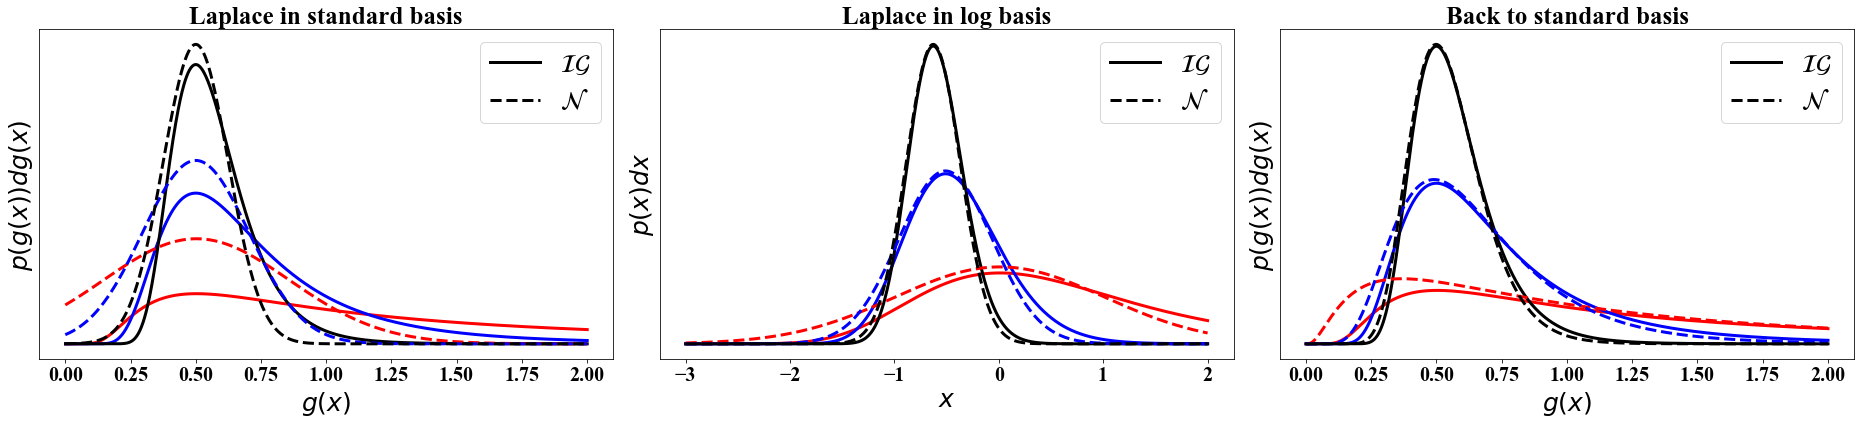

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in power
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide


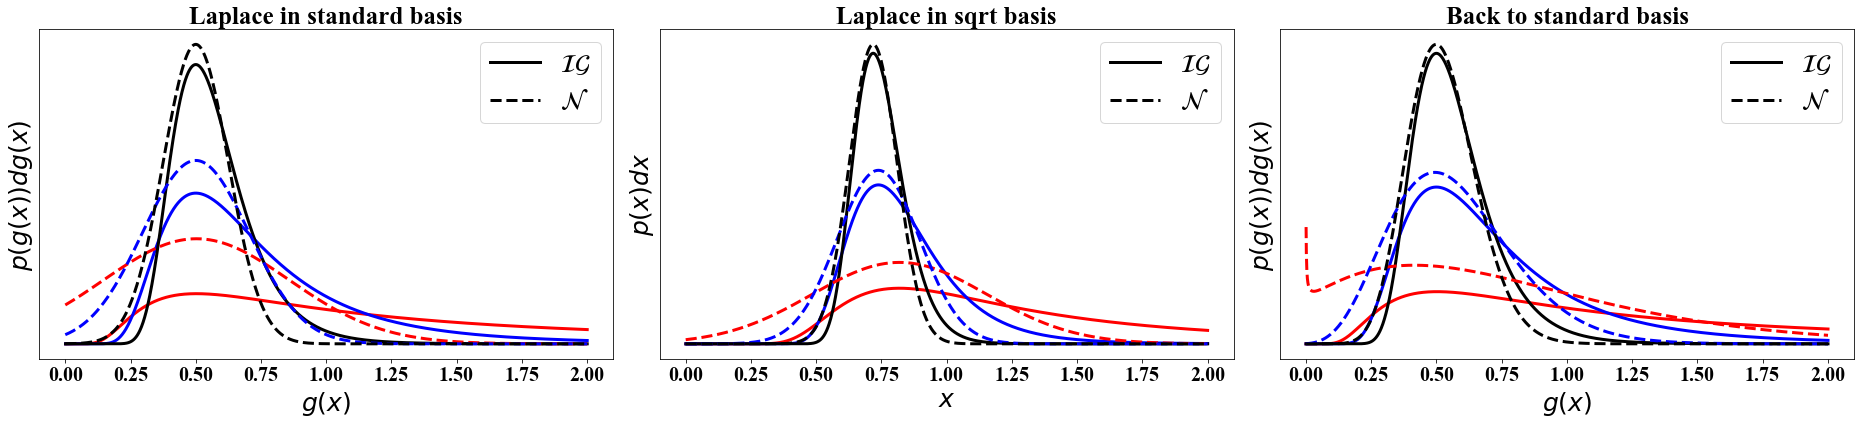

In [25]:
a_s, l_s = 0.99,1
a_m, l_m = 5,3
a_l, l_l = 15, 8
plot_inverse_gamma_t_log(params=[[a_s, l_s], [a_m, l_m], [a_l, l_l]])
plot_inverse_gamma_t_sqrt(params=[[a_s, l_s], [a_m, l_m], [a_l, l_l]])

## calculate MMD for the three pairs of parameters

In [26]:
# use 10 seeds
MMD_results_s = []
MMD_results_m = []
MMD_results_l = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    torch.manual_seed(s)
    MMD_s = MMD_combinations(params = [[a_s], [l_s]], n_samples=2000)
    MMD_m = MMD_combinations(params = [[a_m], [l_m]], n_samples=2000)
    MMD_l = MMD_combinations(params = [[a_l], [l_l]], n_samples=2000)
    MMD_results_s += [MMD_s]
    MMD_results_m += [MMD_m]
    MMD_results_l += [MMD_l]
    
MMD_results_mean_s = np.array(MMD_results_s).mean(0)
MMD_results_mean_m = np.array(MMD_results_m).mean(0)
MMD_results_mean_l = np.array(MMD_results_l).mean(0)
print(MMD_results_mean_s)
print(MMD_results_mean_m)
print(MMD_results_mean_l)

seed:  0
a:  0.99 l:  1
a < 1: not legitimate in standard base
standard:  nan log:  0.03305917978286743 sqrt:  0.12241291999816895
a:  5 l:  3
standard:  0.038169801235198975 log:  0.003007829189300537 sqrt:  0.008626282215118408
a:  15 l:  8
standard:  0.00366288423538208 log:  0.0011644959449768066 sqrt:  0.0006816387176513672
seed:  1
a:  0.99 l:  1
a < 1: not legitimate in standard base
standard:  nan log:  0.033239781856536865 sqrt:  0.12651222944259644
a:  5 l:  3
standard:  0.03153413534164429 log:  0.002161741256713867 sqrt:  0.007722735404968262
a:  15 l:  8
standard:  0.004286289215087891 log:  0.0011461973190307617 sqrt:  0.001060187816619873
seed:  2
a:  0.99 l:  1
a < 1: not legitimate in standard base
standard:  nan log:  0.01788383722305298 sqrt:  0.10941535234451294
a:  5 l:  3
standard:  0.035434603691101074 log:  0.004008054733276367 sqrt:  0.007499992847442627
a:  15 l:  8
standard:  0.004802405834197998 log:  0.0012153983116149902 sqrt:  0.0010590553283691406
seed: 

In [27]:
# normalize to 1 for comparison
MMD_results_mean_s[0] = MMD_results_mean_s[1:].max()
MMD_results_mean_s_normalized = MMD_results_mean_s/MMD_results_mean_s.max()
MMD_results_mean_s_normalized[0] = np.nan
print(MMD_results_mean_s_normalized)
print(MMD_results_mean_m/MMD_results_mean_m.max())
print(MMD_results_mean_l/MMD_results_mean_l.max())

[       nan 0.23095805 1.        ]
[1.         0.12678186 0.2279158 ]
[1.         0.18758762 0.19262872]


## calculate KL div for the three pairs of parameters

In [28]:
KL_results_s = []
KL_results_m = []
KL_results_l = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    KL_s = KL_div_pdf_combinations(params = [[a_s], [l_s]])
    KL_m = KL_div_pdf_combinations(params = [[a_m], [l_m]])
    KL_l = KL_div_pdf_combinations(params = [[a_l], [l_l]], plot=False)
    KL_results_s += [KL_s]
    KL_results_m += [KL_m]
    KL_results_l += [KL_l]
    
KL_results_mean_s = np.array(KL_results_s).mean(0)
KL_results_mean_m = np.array(KL_results_m).mean(0)
KL_results_mean_l = np.array(KL_results_l).mean(0)
print(KL_results_mean_s)
print(KL_results_mean_m)
print(KL_results_mean_l)

seed:  0
a:  0.99 l:  1
a < 1: not legitimate in standard base
standard:  nan log:  79.07229272253852 sqrt:  25.050104683744244
a:  5 l:  3
standard:  59.988771742076324 log:  32.26593857244595 sqrt:  61.67957348172226
a:  15 l:  8
standard:  79.8769059993772 log:  15.941330535927984 sqrt:  39.7057531647268
seed:  1
a:  0.99 l:  1
a < 1: not legitimate in standard base
standard:  nan log:  79.07229272253852 sqrt:  25.050104683744244
a:  5 l:  3
standard:  59.988771742076324 log:  32.26593857244595 sqrt:  61.67957348172226
a:  15 l:  8
standard:  79.8769059993772 log:  15.941330535927984 sqrt:  39.7057531647268
seed:  2
a:  0.99 l:  1
a < 1: not legitimate in standard base
standard:  nan log:  79.07229272253852 sqrt:  25.050104683744244
a:  5 l:  3
standard:  59.988771742076324 log:  32.26593857244595 sqrt:  61.67957348172226
a:  15 l:  8
standard:  79.8769059993772 log:  15.941330535927984 sqrt:  39.7057531647268
seed:  3
a:  0.99 l:  1
a < 1: not legitimate in standard base
standard: 

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in true_divide
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_lau

In [29]:
# normalize to 1 for comparison
KL_results_mean_s[0] = KL_results_mean_s[1:].max()
KL_results_mean_s_normalized = KL_results_mean_s/KL_results_mean_s.max()
KL_results_mean_s_normalized[0] = np.nan
print(KL_results_mean_s_normalized)
print(KL_results_mean_m/KL_results_mean_m.max())
print(KL_results_mean_l/KL_results_mean_l.max())

[       nan 1.         0.31680003]
[0.97258733 0.52312195 1.        ]
[1.         0.19957371 0.49708677]
